In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

## Why Visualize Data?
- Data visualizatino allows you to bring data to life
- We need clear pattern and visual cues to help us quickly make sense of complex information

1. The Ten Second Rule
- Within 10 seconds your audience should be able to understand waht your data visualization is trying to communicate
- Identify any patterns or conclusions from the data

2. The 3 Key Questions
    1. What type of data are you working with?
        - Time-series: Data that spans across continuous time periods
        - Categorical: Data taht can be split up into groups or categories
        - Numeric: Data with quantitative values, either discrete or continuous
        - Hierarchical: Data with natural groups and sub-groups e.g) Treemap
        
    2. What do you want to communicate?
        - Comparison: Compare values over time or across categories
        - Composition: Breaks down the component parts of a whole
        - Distribution: Shows the frequency(rare, common, mean, median, 25th percentile) of values within a series
        - Relationship: Shows the correlation between multiple variables
        
    3. Who is the end user and what do they need?
        - Analyst(Yourself): Likes to see detilas and understanding what's happening at a granular level
        - Manager: Wants summarized information with clear, actionable insights
        - Executive: Needs high-level, clear KPIs to track business health and performance

3. Essential Visuals
    1. KPI Card
    2. Pie Chart
    3. Table: heatmap(color based formatting)
    4. Line Chart: Trends, axis are continuous
    5. Bar Chart: Comparison
    6. Scatter Plot: Relationship between numeric variables 
    7. Area Chart: Time Series + Bar 
    8. 100% Stack bar chart: Comparison + Composition
    9. Histogram: Distribution

4. Chart Formatting: eliminate noise & facilitate understanding
5. Storytelling
    1. Descriptive titles and data labels can be used to tell a clear story

Formatting Options
- fig, ax = subplots()
- Figure Title: fig.suptitle()
- Chart Title: ax.set_title()
- X-Axis Label: ax.set_xlabel()
- Y-Axis Label: ax.set_ylabel()
- Legend: ax.legend()
- X-Axis Ticks: ax.set_xticks()
- Y-Axis Ticks: ax.set_yticks()
- Vertical Line: ax.axvline()
- Horizontal Line: ax.axhline()
- Text: ax.text()
- Spines(borders): ax.spines['side']
- Text Annotation

In [3]:
os.getcwd()

'C:\\Users\\Chiyul Song\\Documents\\Github\\chiyulsong\\Python\\Udemy\\Viz\\Data Viz with Matplotlib & Seaborn'

In [2]:
# Data Prep
housing_raw = pd.read_csv("Data/housing_data.csv", parse_dates=["period_begin", "period_end"])

ca_housing = (
    housing_raw
    .loc[housing_raw["region_name"].str.contains("CA")]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .query("region_name in ['San Francisco', 'Los Angeles']")
)

ca_housing_markets = (
    ca_housing
    .set_index("period_begin")
    .loc[:, ["region_name", "median_active_list_price"]]
    .sort_index()
    .pivot_table(
        index="period_begin",
        columns="region_name",
        values="median_active_list_price"
    )
   .resample("Q")
   .mean()
)

In [3]:
import datetime
max(ca_housing_markets.index) - datetime.datetime(1970, 1, 1)

Timedelta('19173 days 00:00:00')

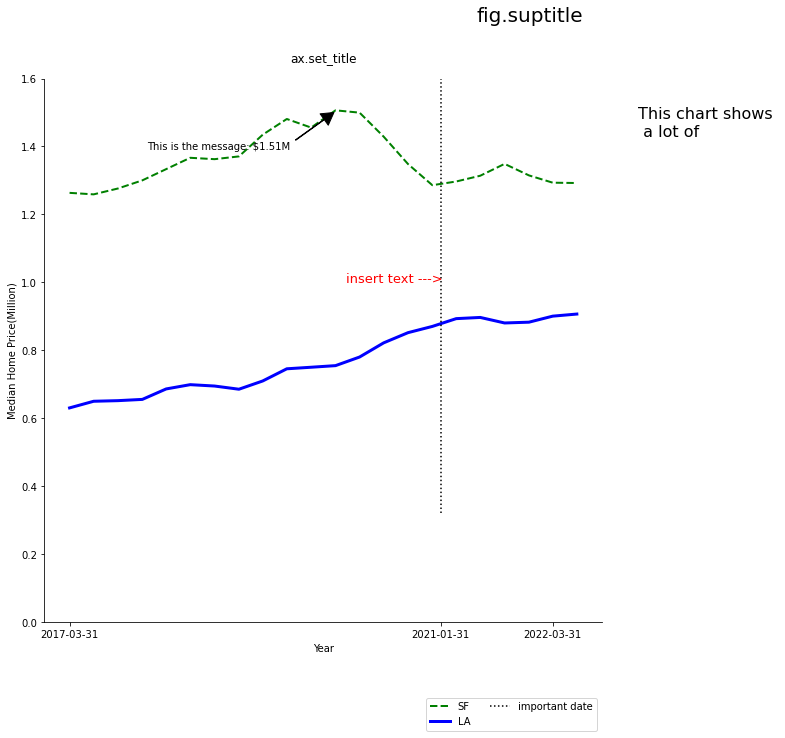

In [11]:
#colors = ['orange', 'green', 'blue', 'red']
#ls = ['', '', '']

fig, ax = plt.subplots(figsize = (10, 10)) # figsize = (6.4, 4.8) # default


#for i, column in enumerate(ca_housing_markets.columns):
#    ax.plot(
#        ca_housing_markets[column] / 100000,
#        color = colors[i],
#        ls = ls[i]
#        linewidth = 2,
#    )


ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"] / 1000000,
    c = 'green',
    label = 'SF',
    linewidth = 2,
    ls = '--'
)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles'] / 1000000,
    c='blue', # c=color
    label = 'LA',
    linewidth = 3,
    ls = "-"
)

# label and title
fig.suptitle("fig.suptitle", fontsize = 20, x = 0.8, y = 0.98) #
ax.set_title("ax.set_title", y = 1.02)
ax.set_xlabel("Year")
ax.set_ylabel("Median Home Price(Million)")


# axis limit
#ax.set_xlim(17500, 19000)
ax.set_ylim(0, 1.6)

# xticks
ax.set_xticks(['2017-03-31', '2021-01-31', '2022-03-31'])
#ax.set_xticks(ca_housing_markets.index[::2])
#plt.xticks(rotation=45)

# vertical line
ax.axvline('2021-01-31', c="black", ls = ":", label = "important date", ymin = 0.2, ymax = 1.4)

#ax.legend(ca_housing_markets.columns)
ax.legend(bbox_to_anchor = (1, -0.13), ncol = 2, frameon=True)

# text
ax.text(18300, 1, 'insert text --->', c = 'red', fontsize = 13)
fig.text(0.95, 0.8, "This chart shows \n a lot of", fontsize = 16)
ax.annotate("This is the message: $1.51M ",
            xy = (18255, 1.5),
            xytext = (17550, 1.40),
            arrowprops = dict(
                facecolor = "black",
                width = 0.5,
                headwidth = 14,
                ),
            verticalalignment = "center"
           )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)